In [8]:
import sys
import os
workspace_path = os.path.join(os.path.abspath(".."))
sys.path.append(workspace_path)
workspace_path

'c:\\Code\\job_discrimination'

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pandas.core.frame import DataFrame

In [10]:
pd.options.display.float_format = "{:.2f}".format

In [11]:
# Changed original_data to cleaned_data
filepath = os.path.join(workspace_path, "data", "cleaned_data", "applicants.csv")
df = pd.read_csv(filepath)


## Checking and cleaning data

In [12]:
df

,Job Description,Apps Received,Female,Male,Unknown_Gender
0,311 DIRECTOR 9206,54,20,31,3
1,ACCOUNTING CLERK 1223,648,488,152,8
2,AIRPORT MANAGER 7260,51,13,37,1
3,AIRPORT POLICE LIEUTENANT 2013,48,9,38,1
4,AQUARIST 2400,40,15,24,1
...,...,...,...,...,...
182,WASTEWATER TREATMENT LABORATORY MANAGER 7840 -...,16,6,9,1
183,WASTEWATER TREATMENT OPERATOR 4123 - ARCHIVE,125,9,113,3
184,WATER MICROBIOLOGIST 7857 - ARCHIVE,179,89,82,8
185,WATER UTILITY WORKER 3912 - ARCHIVE,96,2,92,2


In [13]:
df.describe()

,Apps Received,Female,Male,Unknown_Gender
count,187.00,187.00,187.00,187.00
mean,499.72,199.03,291.71,8.98
std,2252.04,1466.00,991.02,36.56
min,5.00,0.00,2.00,0.00
25%,36.50,2.00,26.00,0.00
50%,100.00,13.00,70.00,2.00
75%,260.00,59.50,166.00,6.00
max,28230.00,19892.00,9356.00,370.00


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Job Description  187 non-null    object
 1   Apps Received    187 non-null    int64 
 2   Female           187 non-null    int64 
 3   Male             187 non-null    int64 
 4   Unknown_Gender   187 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.4+ KB


In [15]:
# Check if counts are consistent
df["control_sum"] = df["Female"] + df["Male"] + df["Unknown_Gender"] - df["Apps Received"]
df.describe()

,Apps Received,Female,Male,Unknown_Gender,control_sum
count,187.00,187.00,187.00,187.00,187.00
mean,499.72,199.03,291.71,8.98,0.00
std,2252.04,1466.00,991.02,36.56,0.00
min,5.00,0.00,2.00,0.00,0.00
25%,36.50,2.00,26.00,0.00,0.00
50%,100.00,13.00,70.00,2.00,0.00
75%,260.00,59.50,166.00,6.00,0.00
max,28230.00,19892.00,9356.00,370.00,0.00


In [16]:
# Check if Job Description is unique. (Finding: It is not.)
df["row_count"] = [1] * len(df)
df.groupby("Job Description").sum().nlargest(5, "row_count")

,Apps Received,Female,Male,Unknown_Gender,control_sum,row_count
Job Description,,,,,,
HOUSING INVESTIGATOR 8516,409,223,182,4,0,2
TRUCK AND EQUIPMENT DISPATCHER 3586,75,0,75,0,0,2
311 DIRECTOR 9206,54,20,31,3,0,1
ACCOUNTING CLERK 1223,648,488,152,8,0,1
AIR CONDITIONING MECHANIC (3774) - ARCHIVE,263,1,259,3,0,1


In [17]:
df.sort_values(by="Apps Received", ascending=False)

,Job Description,Apps Received,Female,Male,Unknown_Gender,control_sum,row_count
26,CUSTOMER SERVICE REPRESENTATIVE 1230,28230,19892,7968,370,0,1
163,Firefighter 2014 (Filing starts on July 22 at ...,10215,531,9356,328,0,1
66,METER READER 1611,4479,1135,3311,33,0,1
90,SECURITY OFFICER 2014 (Filing starts on June 1...,4171,978,3155,38,0,1
135,WAREHOUSE AND TOOLROOM WORKER 1832,3551,314,3219,18,0,1
...,...,...,...,...,...,...,...
15,CARPET LAYER 2014,9,1,8,0,0,1
138,WATER SERVICES MANAGER,8,0,8,0,0,1
117,SOLID WASTE DISPOSAL SUPERINTENDENT 4108,5,0,5,0,0,1
19,CHIEF OF AIRPORT PLANNING 7945,5,3,2,0,0,1


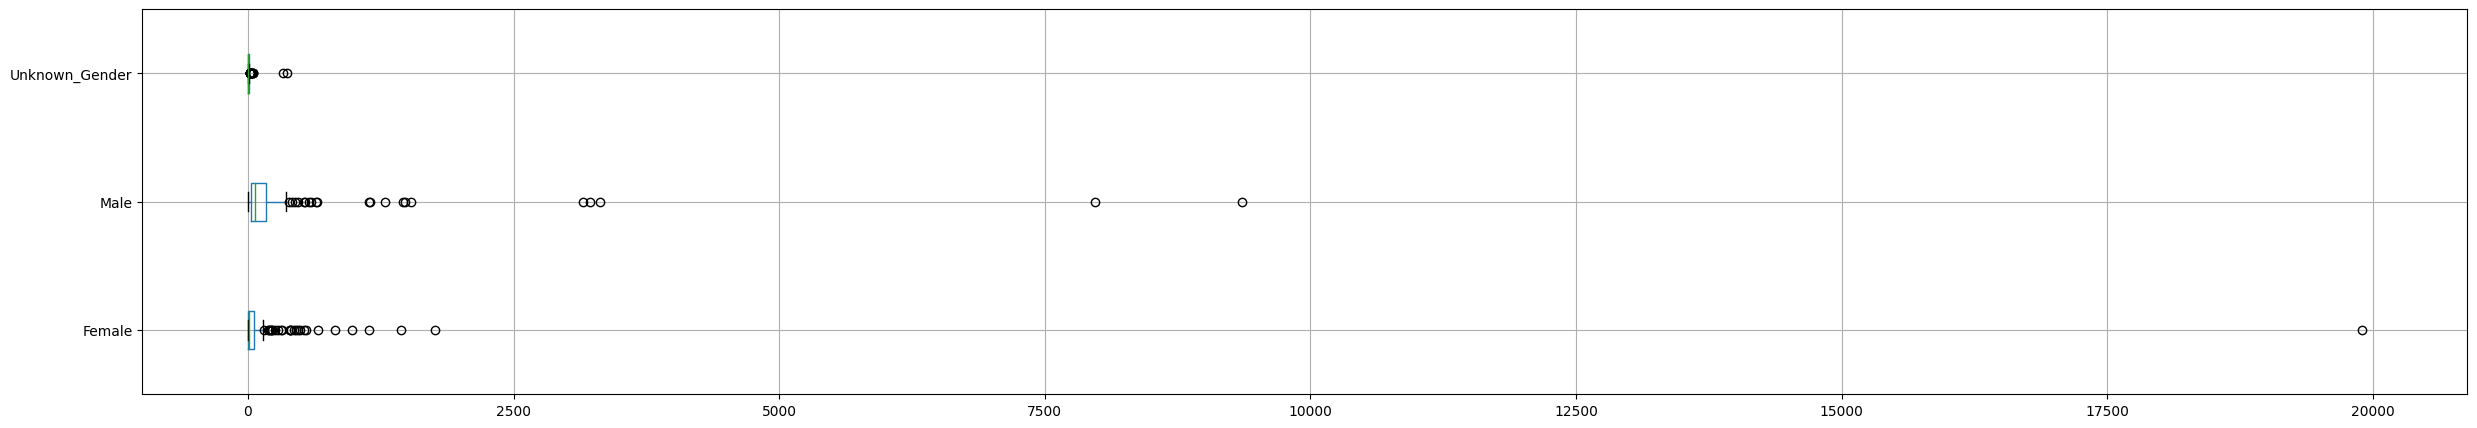

In [18]:
# Visual check for outliers
df.boxplot(column=["Female", "Male", "Unknown_Gender"], figsize=(30, 5), vert=False)
plt.show()

In [19]:
df[["Female_share", "Male_share", "Unknown_Gender_share"]] = df[["Female", "Male", "Unknown_Gender"]].div(df["Apps Received"], axis=0)
df.describe()

,Apps Received,Female,Male,Unknown_Gender,control_sum,row_count,Female_share,Male_share,Unknown_Gender_share
count,187.00,187.00,187.00,187.00,187.00,187.00,187.00,187.00,187.00
mean,499.72,199.03,291.71,8.98,0.00,1.00,0.26,0.72,0.02
std,2252.04,1466.00,991.02,36.56,0.00,0.00,0.24,0.25,0.02
min,5.00,0.00,2.00,0.00,0.00,1.00,0.00,0.07,0.00
25%,36.50,2.00,26.00,0.00,0.00,1.00,0.03,0.51,0.00
50%,100.00,13.00,70.00,2.00,0.00,1.00,0.19,0.78,0.02
75%,260.00,59.50,166.00,6.00,0.00,1.00,0.46,0.95,0.04
max,28230.00,19892.00,9356.00,370.00,0.00,1.00,0.92,1.00,0.11


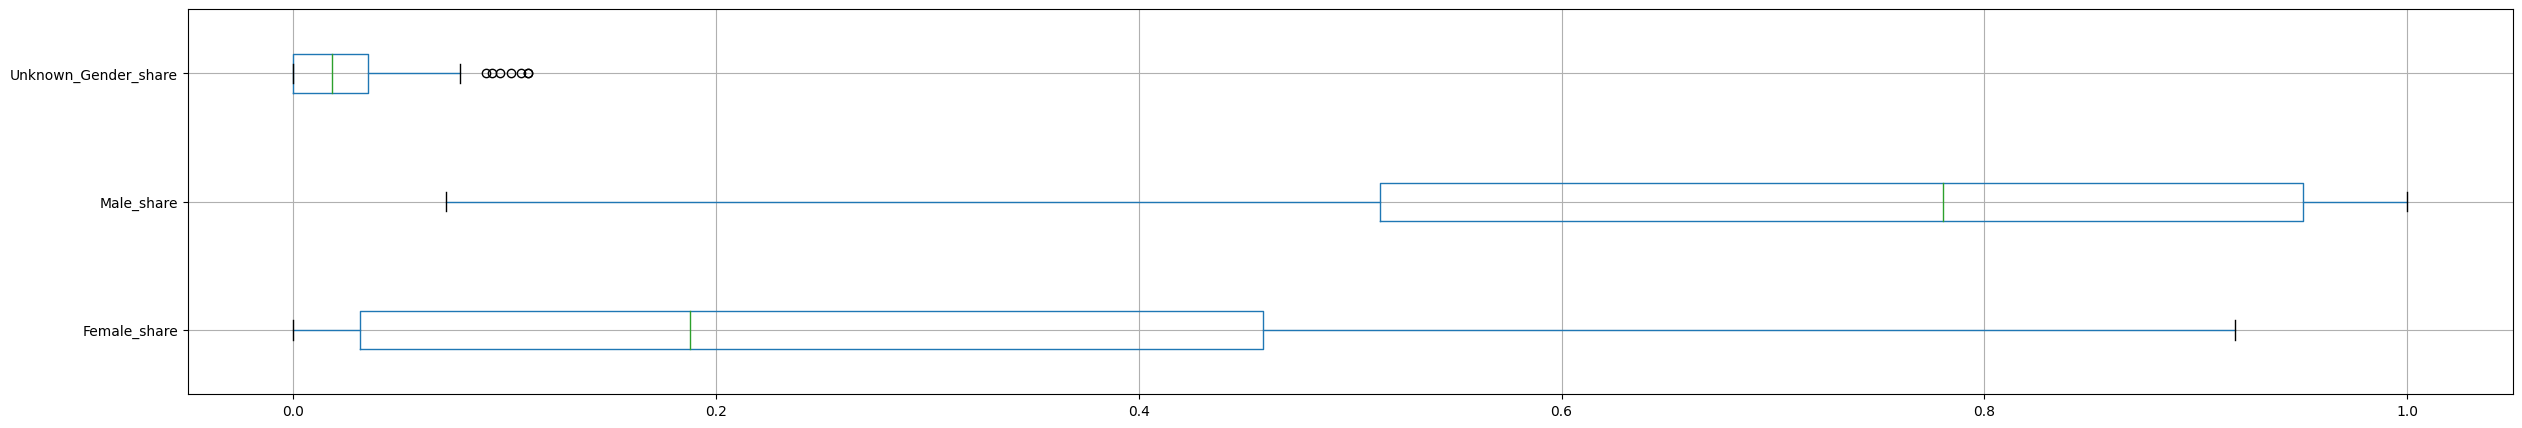

In [20]:
df.boxplot(column=["Female_share", "Male_share", "Unknown_Gender_share"], figsize=(30, 5), vert=False)
plt.show()

In [21]:
# Removing extreme values to see the rest of the data in more detail
def remove_outliers(df, columns, n_std):
    df = df.copy()
    for col in columns:      
        mean = df[col].mean()
        sd = df[col].std()
        
        df = df[(df[col] <= mean+(n_std*sd))]
        
    return df

n_std = 4
columns = ["Apps Received"]
df = remove_outliers(df, columns, n_std)
df.describe()

,Apps Received,Female,Male,Unknown_Gender,control_sum,row_count,Female_share,Male_share,Unknown_Gender_share
count,185.00,185.00,185.00,185.00,185.00,185.00,185.00,185.00,185.00
mean,297.31,90.79,201.22,5.31,0.00,1.00,0.26,0.72,0.02
std,627.29,229.02,466.68,8.72,0.00,0.00,0.24,0.25,0.02
min,5.00,0.00,2.00,0.00,0.00,1.00,0.00,0.07,0.00
25%,35.00,2.00,26.00,0.00,0.00,1.00,0.03,0.51,0.00
50%,97.00,13.00,70.00,2.00,0.00,1.00,0.19,0.78,0.02
75%,253.00,58.00,162.00,6.00,0.00,1.00,0.46,0.95,0.04
max,4479.00,1762.00,3311.00,47.00,0.00,1.00,0.92,1.00,0.11


In [22]:
# Dropping control columns
df.drop(columns=["control_sum", "row_count"], inplace=True)
# Adding a unique id to the posts, since Job Description is not unique
# For use when melting dataframe, which might lead to index confusion
df["Recruitment_ID"] = [i + 1 for i in range(len(df))]
df.describe()

,Apps Received,Female,Male,Unknown_Gender,Female_share,Male_share,Unknown_Gender_share,Recruitment_ID
count,185.00,185.00,185.00,185.00,185.00,185.00,185.00,185.00
mean,297.31,90.79,201.22,5.31,0.26,0.72,0.02,93.00
std,627.29,229.02,466.68,8.72,0.24,0.25,0.02,53.55
min,5.00,0.00,2.00,0.00,0.00,0.07,0.00,1.00
25%,35.00,2.00,26.00,0.00,0.03,0.51,0.00,47.00
50%,97.00,13.00,70.00,2.00,0.19,0.78,0.02,93.00
75%,253.00,58.00,162.00,6.00,0.46,0.95,0.04,139.00
max,4479.00,1762.00,3311.00,47.00,0.92,1.00,0.11,185.00


In [23]:
# Melting the df to get all Gender labels in one column
count_columns = ["Female", "Male", "Unknown_Gender"]
df_melted = df.melt(id_vars=["Recruitment_ID", "Job Description", "Apps Received"], var_name="Gender", value_vars=count_columns, value_name="Count")

In [24]:
# Calculate gender share of total Apps
df_melted["Share"] = df_melted["Count"].div(df_melted["Apps Received"], axis=0)
df_melted

,Recruitment_ID,Job Description,Apps Received,Gender,Count,Share
0,1,311 DIRECTOR 9206,54,Female,20,0.37
1,2,ACCOUNTING CLERK 1223,648,Female,488,0.75
2,3,AIRPORT MANAGER 7260,51,Female,13,0.25
3,4,AIRPORT POLICE LIEUTENANT 2013,48,Female,9,0.19
4,5,AQUARIST 2400,40,Female,15,0.38
...,...,...,...,...,...,...
550,181,WASTEWATER TREATMENT LABORATORY MANAGER 7840 -...,16,Unknown_Gender,1,0.06
551,182,WASTEWATER TREATMENT OPERATOR 4123 - ARCHIVE,125,Unknown_Gender,3,0.02
552,183,WATER MICROBIOLOGIST 7857 - ARCHIVE,179,Unknown_Gender,8,0.04
553,184,WATER UTILITY WORKER 3912 - ARCHIVE,96,Unknown_Gender,2,0.02


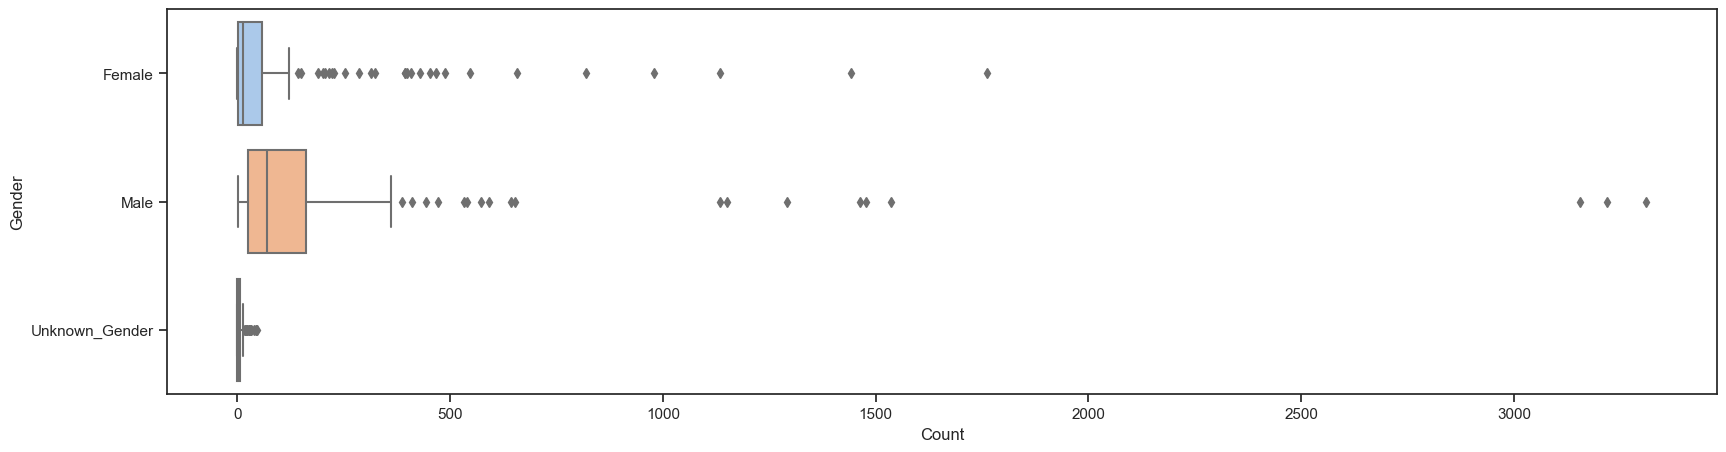

In [25]:
sns.set_theme(style="ticks", palette="pastel")
fig, ax = plt.subplots(figsize=(20, 5))
sns.boxplot(data=df_melted, x="Count", y="Gender")
plt.show()

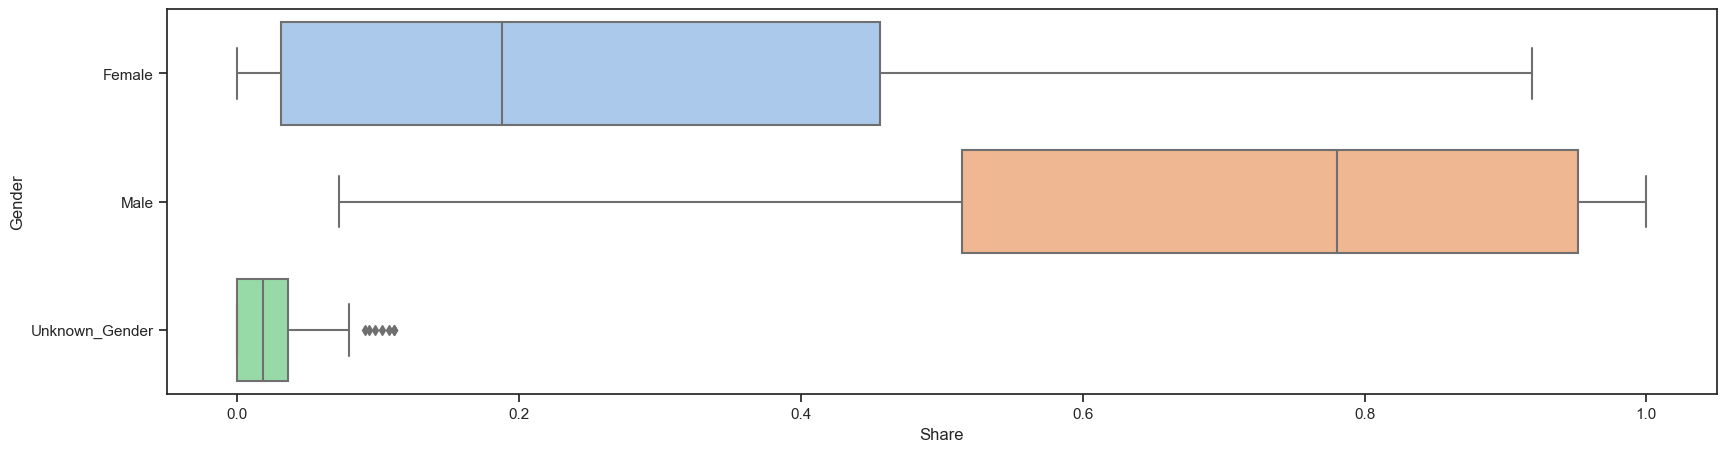

In [26]:
sns.set_theme(style="ticks", palette="pastel")
fig, ax = plt.subplots(figsize=(20, 5))
sns.boxplot(data=df_melted, x="Share", y="Gender")
plt.show()

In [27]:
df_melted.groupby(by=["Recruitment_ID", "Job Description", "Apps Received", "Gender"]).sum()

Count  \
Recruitment_ID Job Description                              Apps Received Gender                  
1              311 DIRECTOR 9206                            54            Female             20   
                                                                          Male               31   
                                                                          Unknown_Gender      3   
2              ACCOUNTING CLERK 1223                        648           Female            488   
                                                                          Male              152   
...                                                                                         ...   
184            WATER UTILITY WORKER 3912 - ARCHIVE          96            Male               92   
                                                                          Unknown_Gender      2   
185            WORKERS' COMPENSATION ANALYST 1774 - ARCHIVE 166           Female            100   
                                                                          Male               61   
                                                                          Unknown_Gender      5   

                                                                                          Share  
Recruitment_ID Job Description                              Apps Received Gender                 
1              311 DIRECTOR 9206                            54            Female           0.37  
                                                                          Male             0.57  
                                                                          Unknown_Gender   0.06  
2              ACCOUNTING CLERK 1223                        648           Female           0.75  
                                                                          Male             0.23  
...                                                                                         ...  
184            WATER UTILITY WORKER 3912 - ARCHIVE          96            Male             0.96  
                                                                          Unknown_Gender   0.02  
185            WORKERS' COMPENSATION ANALYST 1774 - ARCHIVE 166           Female           0.60  
                                                                          Male             0.37  
                                                                          Unknown_Gender   0.03  

[555 rows x 2 columns]

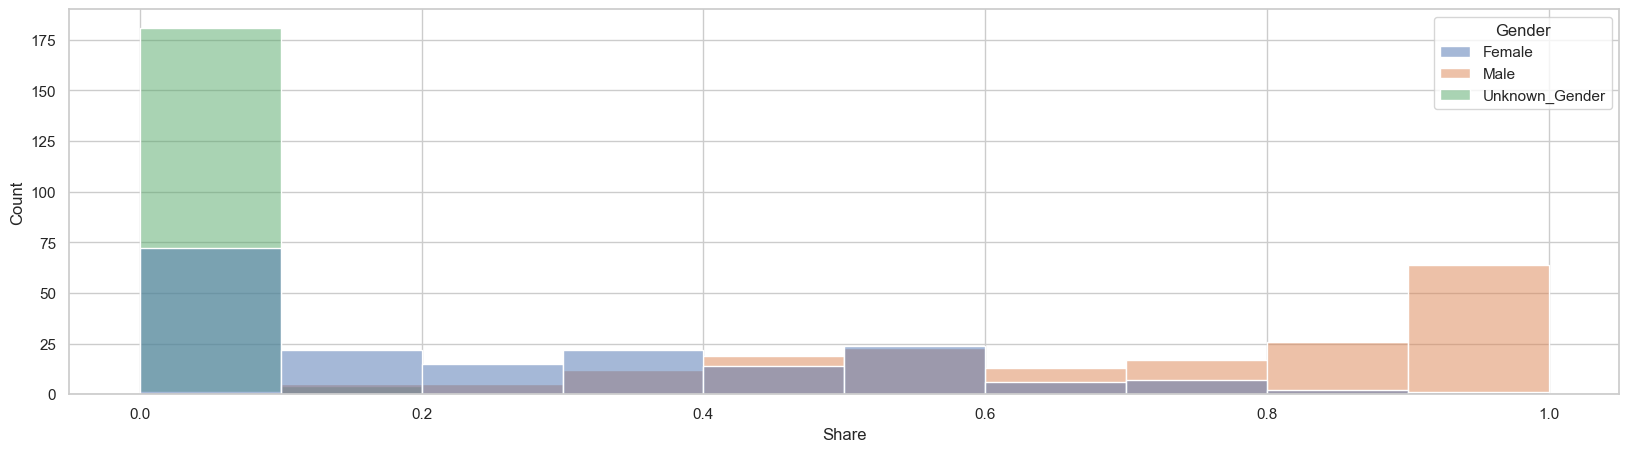

In [28]:
# Distribution of female/male/unknown applicants
# Example of interpretations: 
# The share of female applicants was below 0.1 for slightly below 75 recruitments.
# More than 60 recruitments had only male applicants.
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(20, 5))
sns.histplot(data=df_melted, x="Share", hue="Gender", multiple="layer", stat="count", bins=10)
plt.show()

In [29]:
# Double-checking results
df_melted.loc[df_melted["Share"] < 0.1, :].groupby(by="Gender").value_counts()

Gender          Recruitment_ID  Job Description                                           Apps Received  Count  Share
Female          9               ASSISTANT COMMUNICATIONS CABLE WORKER 3808                105            3      0.03     1
                11              AUDIO VISUAL TECHNICIAN (6147)                            329            27     0.08     1
                136             WASTEWATER COLLECTION SUPERVISOR 4113 (REVISED 11/25/13)  44             1      0.02     1
                103             SENIOR HEAVY DUTY EQUIPMENT MECHANIC 3745                 87             1      0.01     1
                104             SENIOR HYDROGRAPHER 7264                                  13             0      0.00     1
                                                                                                                        ..
Unknown_Gender  17              CHIEF CLERK PERSONNEL 1260                                39             0      0.00     1
                18   

In [30]:
# Splitting male shares to bins, to get better overview
bins = [0, 0.3, 0.7, 1.0]
labels = ["0 - 30%", "30 - 80%", "80 - 100%"]
df['Male_bins'] = pd.cut(x=df['Male_share'], bins=bins, labels=labels)


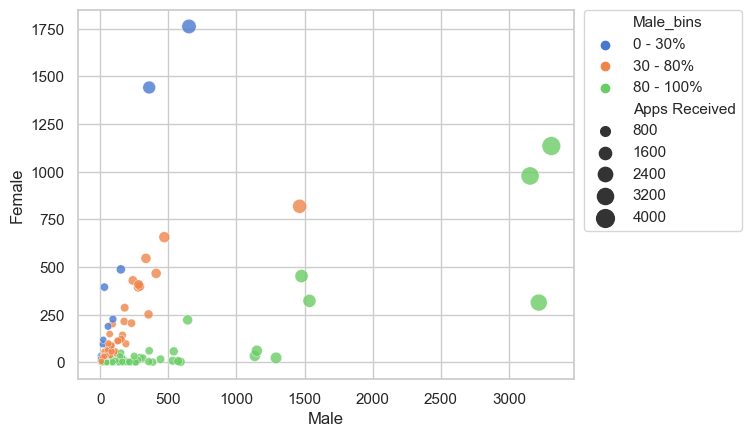

In [31]:
# Female vs Male applicants. Size of dot indicating total number of applicants
sns.color_palette("Blues", as_cmap=True)
sns.scatterplot(data=df, x="Male", y="Female", hue="Male_bins", palette="muted", alpha=0.8, size="Apps Received", sizes=(20, 200), size_norm=(0, 5000))
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

In [32]:
df[["Apps Received", "Female", "Male", "Unknown_Gender", "Male_bins"]].groupby(by="Male_bins").sum(numeric_only=True)

,Apps Received,Female,Male,Unknown_Gender
Male_bins,,,,
0 - 30%,6291,4800,1408,83
30 - 80%,15875,7738,7670,467
80 - 100%,32837,4258,28147,432


In [33]:
df.groupby(by="Male_bins")["Job Description"].value_counts().head(20)

Male_bins  Job Description                                 
0 - 30%    ACCOUNTING CLERK 1223                               1
           CHIEF CLERK PERSONNEL 1260                          1
           COMMERCIAL SERVICE SUPERVISOR 1213 - ARCHIVE        1
           POLICE SERVICE REPRESENTATIVE 2207                  1
           PRINCIPAL COMMUNICATIONS OPERATOR 1458 - ARCHIVE    1
           PRINCIPAL PUBLIC RELATIONS REPRESENTATIVE 1786      1
           SENIOR CLERK TYPIST 1368                            1
           SMS PAYMENT CLERK 1214 - ARCHIVE                    1
           UTILITY EXECUTIVE SECRETARY 1336                    1
           VOLUNTEER COORDINATOR 2495                          1
           WORKERS' COMPENSATION ASSISTANT 1775                1
30 - 80%   HOUSING INVESTIGATOR 8516                           2
           311 DIRECTOR 9206                                   1
           ANIMAL CARE TECHNICIAN 4310 - ARCHIVE               1
           AQUARIST 2400      

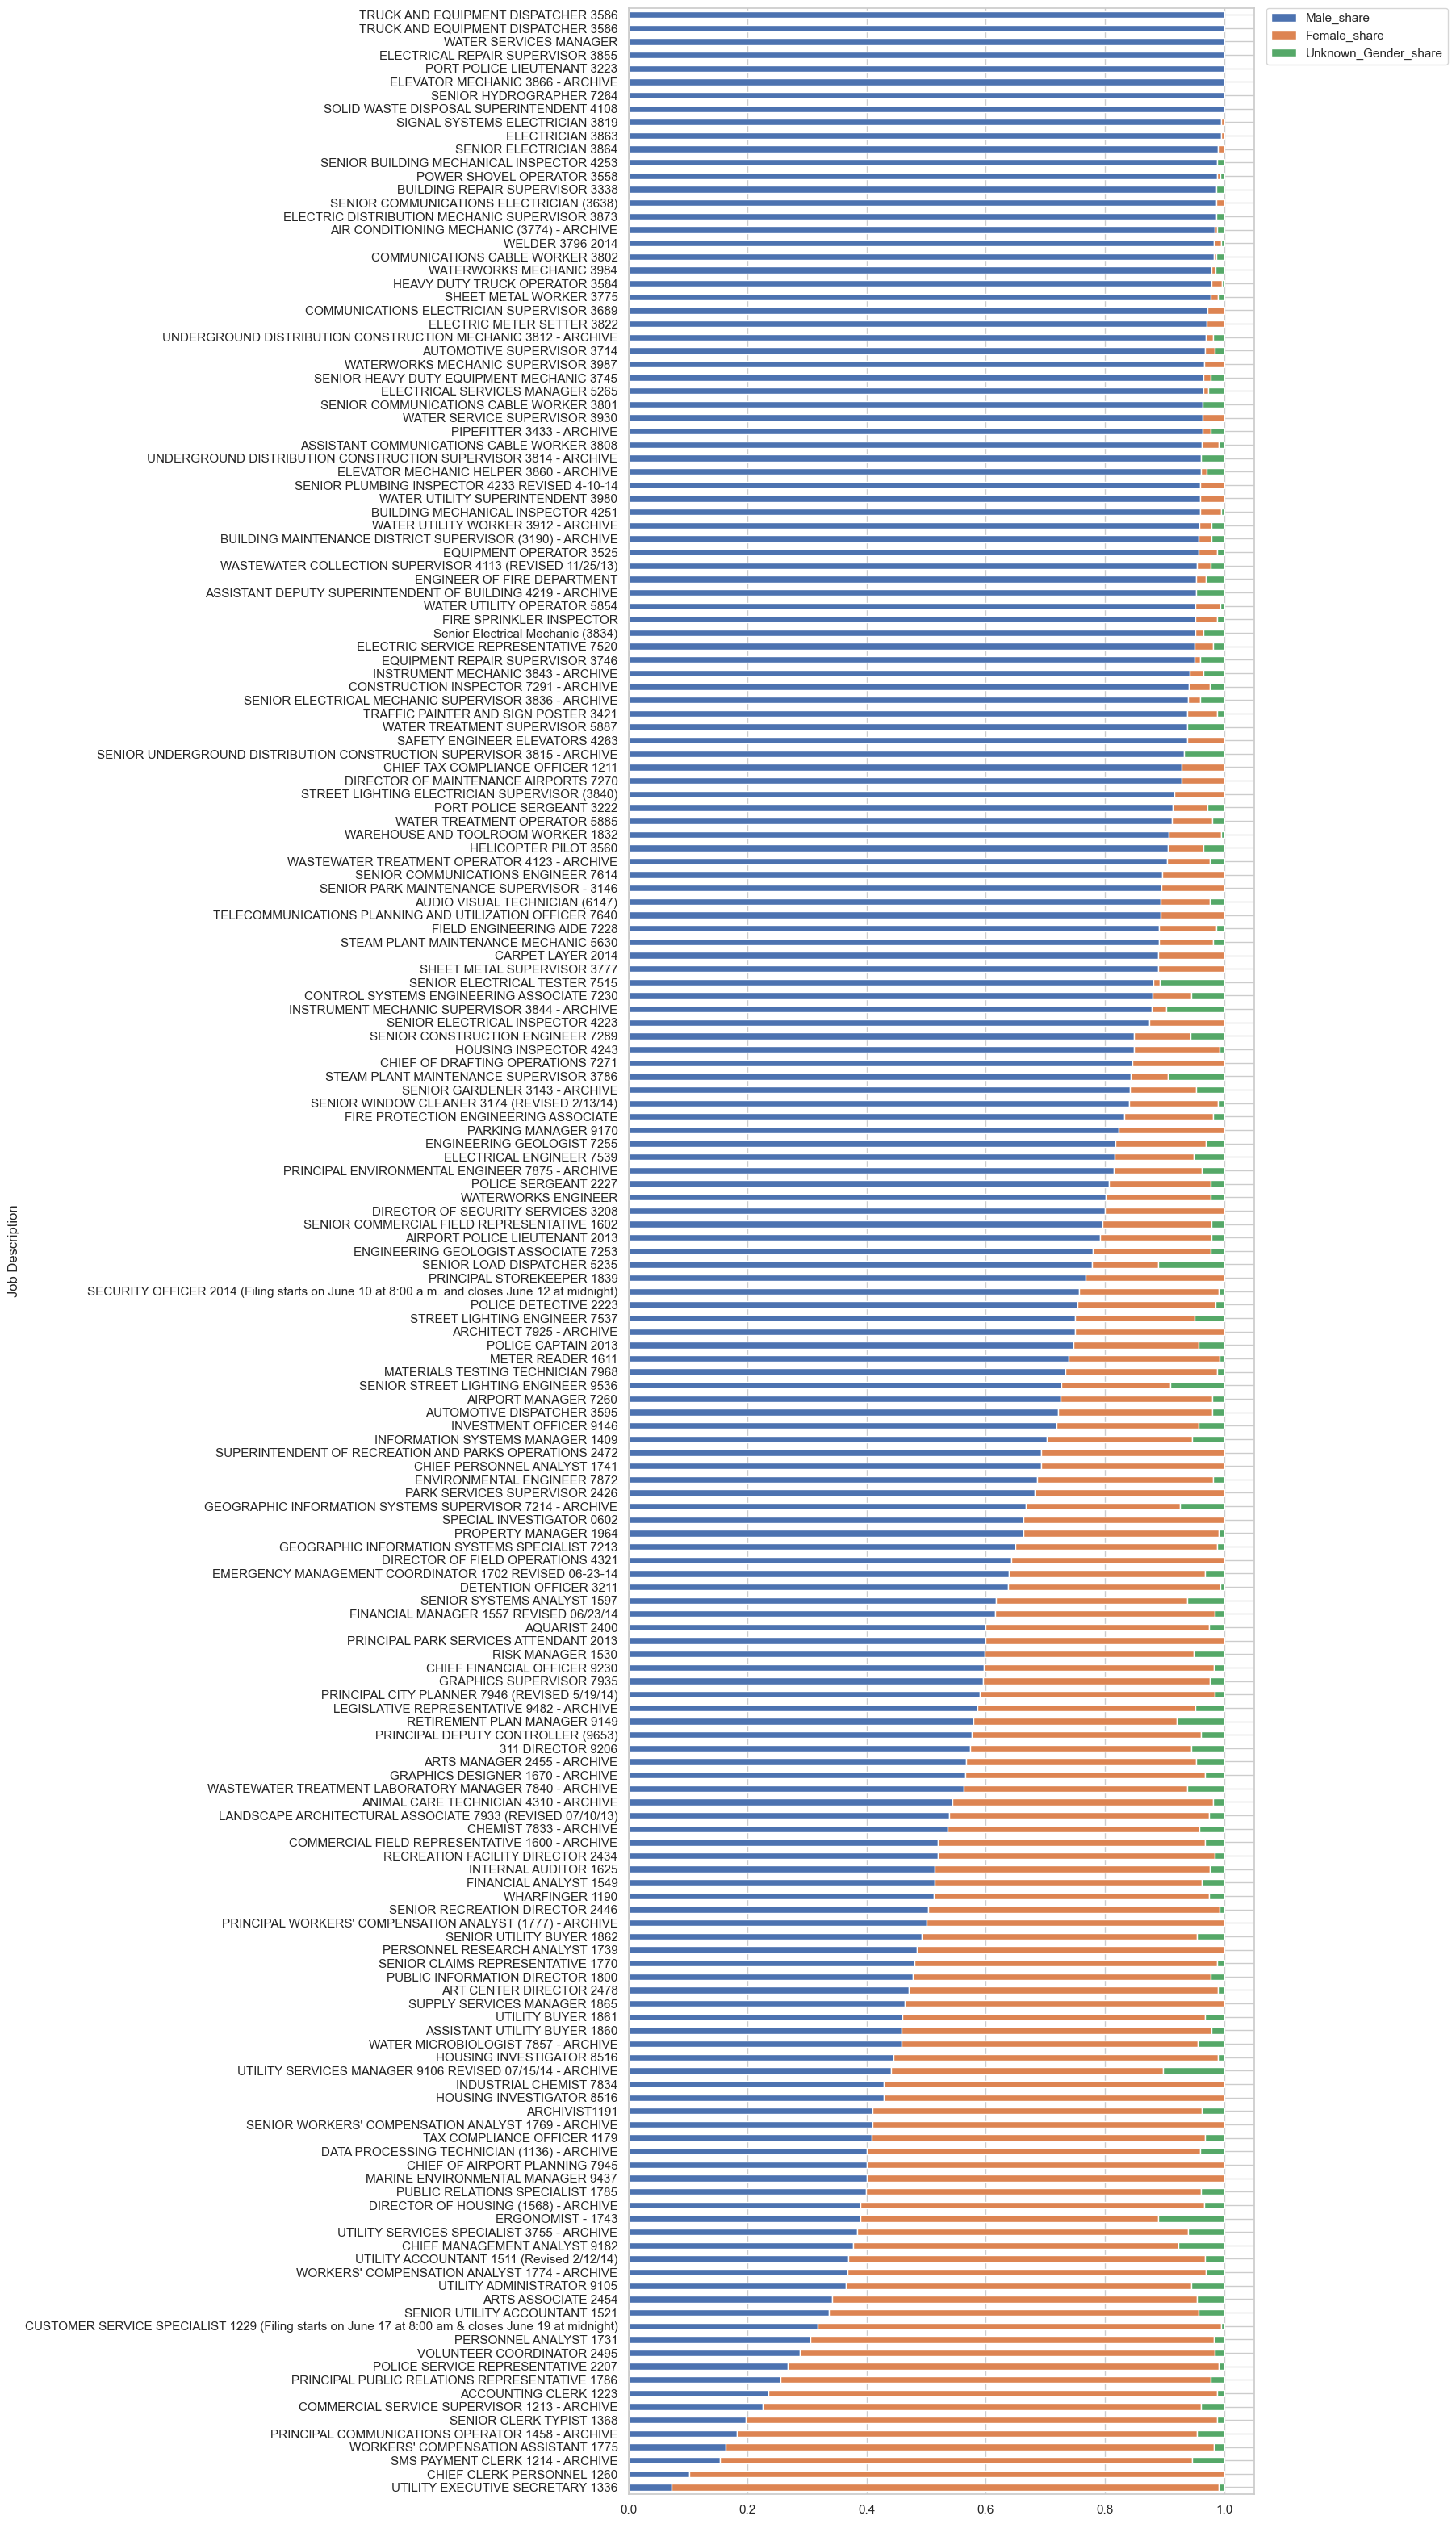

In [34]:
df[["Male_share", "Female_share", "Unknown_Gender_share", "Job Description"]].set_index("Job Description").sort_values(by="Male_share").plot(kind="barh", stacked=True, figsize=(10, 40))
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()